# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 20 April, 2025

---


Import all the required libraries.

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Midpoint Filter:
 The Midpoint Filter is a simple noise reduction technique that computes the average of the maximum and minimum pixel values in a defined neighborhood. It is effective against Gaussian and uniform noise.

 Uses of Mid Point
 - Reduces noise in images while maintaining edges.
 - Useful for images affected by both Gaussian and uniform noise.

<ipython-input-10-8ef2294ffc21>:10: RuntimeWarning: overflow encountered in scalar add
  filtered_img[i, j] = (max_val + min_val) // 2


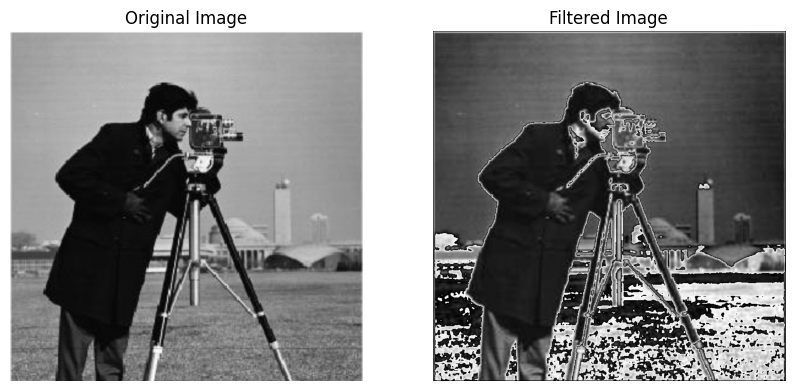

In [10]:
def midpoint_filter(image, kernel_size):
  pad = kernel_size // 2
  filtered_img = np.zeros_like(image)

  for i in range(pad, image.shape[0]-pad):
    for j in range(pad, image.shape[1]- pad):
      region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
      max_val = np.max(region)
      min_val = np.min(region)
      filtered_img[i, j] = (max_val + min_val) // 2

  return filtered_img

image = cv2.imread("spatial.jpg", cv2.IMREAD_GRAYSCALE)

filtered_image = midpoint_filter(image, 3)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

 ### Alpha-trimmed Mean Filter:

 The Alpha-trimmed Mean Filter removes extreme values (both high and low) from a pixel’s neighbourhood before computing the average. It is effective against salt-and-pepper noise and Gaussian noise.

 Uses of Alpha-trimmed Mean
 - Handles mixed noise conditions (combination of salt-and-pepper and Gaussian noise).
 - Retains image details while suppressing outlier values

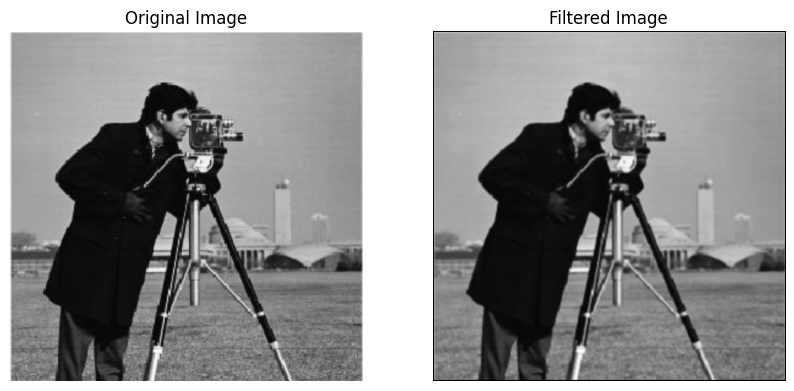

In [11]:
def alpha_trimmed_mean_filter(image, kernel_size, alpha):
  pad = kernel_size // 2
  filtered_img = np.zeros_like(image)
  for i in range(pad, image.shape[0]- pad):
    for j in range(pad, image.shape[1]- pad):
      region= image [i -pad:i +pad + 1, j -pad:j + pad + 1].flatten()
      region_sorted = np.sort(region)
      trim_amount = int(alpha * len(region_sorted))
      trimmed_region = region_sorted [trim_amount:-trim_amount]
      filtered_img[i, j] = np.mean(trimmed_region)
  return filtered_img
image = cv2.imread("spatial.jpg", cv2.IMREAD_GRAYSCALE)
filtered_image = alpha_trimmed_mean_filter(image, 5, 0.2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap="gray")
plt.title('Filtered Image')
plt.axis('off')
plt.show()

### Contraharmonic Mean Filter:
 The Contraharmonic Mean Filter is designed to remove either salt noise or pepper noise based on the choice of the filter order Q.
 - If Q > 0, it removes pepper noise.
 - If Q < 0, it removes salt noise.

 Uses of BLPF
 - Noise removal
 preparing images for segmentation.

 - Useful for reducing salt-and-pepper noise selectively.
 - More effective than the median filter in certain cases.


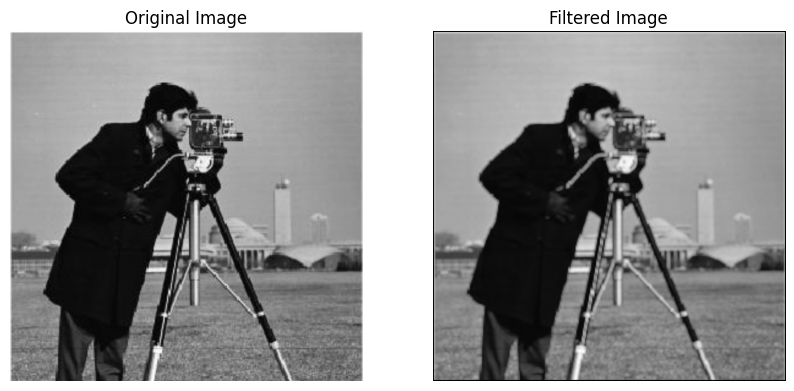

In [13]:
def contraharmonic_mean_filter(image, kernel_size, Q):
  pad = kernel_size // 2
  filtered_img = np.zeros_like(image, dtype=np.float32)
  for i in range(pad, image.shape[0]- pad):
    for j in range(pad, image.shape[1] -pad):
      region = image[i -pad:i+pad + 1, j -pad:j + pad + 1].astype(np.float32)
      numerator = np.sum(region ** (Q + 1))
      denominator =np.sum(region ** Q)
      filtered_img[i, j] = numerator / (denominator + 1e-5)
  return np.clip(filtered_img, 0, 255).astype(np.uint8)

image = cv2.imread("spatial.jpg", cv2.IMREAD_GRAYSCALE)
filtered_image = contraharmonic_mean_filter(image, 5, 1.5)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

### Conclusion

In this lab, we explored and implemented three spatial domain filtering techniques: the contraharmonic mean filter, the alpha-trimmed mean filter, and the midpoint filter. Each method demonstrated unique strengths in noise reduction depending on the nature of the noise present in the image.

The contraharmonic mean filter proved effective in removing salt or pepper noise selectively based on the chosen Q parameter, highlighting its adaptability. The alpha-trimmed mean filter offered a balance between mean and median filters, effectively reducing both Gaussian and impulse noise by discarding outlier pixel values. Lastly, the midpoint filter provided a simple yet efficient way to reduce uniform noise by averaging the extreme pixel values in the neighborhood.

Overall, this experiment reinforced the importance of selecting appropriate filtering techniques based on the type and characteristics of noise, as no single filter universally performs best in all scenarios. Understanding the mathematical foundation and behavior of each filter allows for informed decision-making in practical image enhancement tasks.

